## Unsupervised Clustering

In [1]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We would like to find out the relationship between lyrics and genres of songs, so we aimed to use unsupervised clustering to partition the songs into different genres. Idealy, each cluster will represent one genre. 

We chose k-means clustering to train the data (word embeddings of songs). We used the scikit-learn library to do k-means clustering, which is simple and efficient. We set the number of clusters to 6, which is the number of genres.

In [2]:
def kmeans_cluster(data, df, n):
    # detete data with NAN
    nan_x, nan_y = np.where(np.isnan(data))
    nan_x = list(set(nan_x))  # 224
    nan_x.sort(reverse=True)

    for i in nan_x:
        df.drop(axis=0, index=i, inplace=True)
        data = np.delete(data, i, axis=0)
    df.reset_index(drop=True, inplace=True)

    # print(data.size)  # 5026 * 300

    kmeans = KMeans(n_clusters=n).fit(data)
    # print(kmeans.labels_)
    # print(kmeans.cluster_centers_)

    return data, kmeans

In [10]:
# Load data, len = 5250
data = np.load('../updated_embeddings.npy')
df = pd.read_csv('../updated_song_map.csv')
n_genres = 6

new_data, kmeans = kmeans_cluster(data, df, n_genres)

To better illustrate the result, we reduced the dimensionality of the word embeddings to 2 so that we could draw a scatter diagram according to the data. We used t-Distributed Stochastic Neighbor Embedding (t-SNE) for dimensionality reduction. T-SNE is a non-linear a machine learning technique which is well suited for the visualization of high-dimensional datasets. The main advantage of t-SNE is the ability to preserve local structure. This means that points which are close to one another in the high-dimensional data set will tend to be close to one another in the diagram.

In [3]:
def visualization(data, labels):
    tsne = TSNE(n_components=2)
    decomposition_data = tsne.fit_transform(data)

    x = []
    y = []
    for i in decomposition_data:
        x.append(i[0])
        y.append(i[1])

    fig = plt.figure(figsize=(15, 15))
    ax = plt.axes()
    plt.scatter(x, y, c=labels, marker="x")
    plt.xticks(())
    plt.yticks(())
#     plt.savefig('./cluster.png')
    plt.show()

As shown below, each cross represents a song and each color represents a cluster.

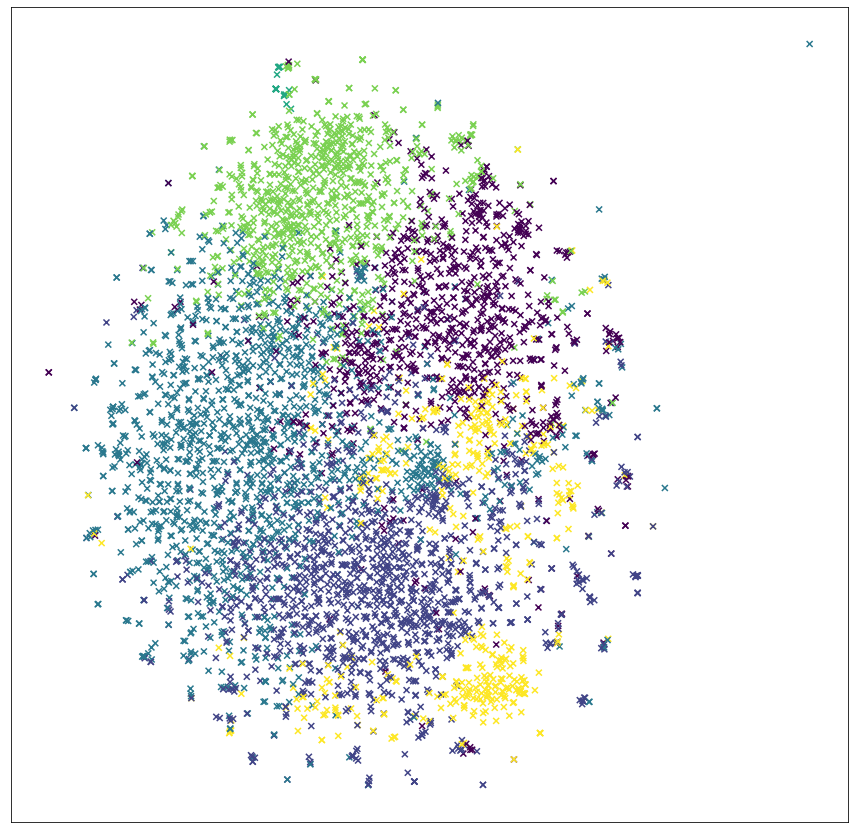

In [15]:
visualization(new_data, kmeans.labels_)

We would like to know that if our classification was accurate and if every cluster was actually representing a genre. Therefore, we calculated the mean purity of each cluster, which is the percentage of the majority genre in one cluster. The higher the purity is, the better the classifications should be. 

Unfortunately, the purity was quite low, only around 0.34.

In [4]:
def calculate_purity(kmeans, n):
    purity_cnt = np.zeros((n, n))
    for index, label in enumerate(kmeans.labels_):
        # print("index: {}, genre: {}, label: {}".format(index, df["genre_map"][index], label))
        purity_cnt[label][df["genre_map"][index]] += 1

    result = np.mean(np.max(purity_cnt, axis=1)/np.sum(purity_cnt, axis=1))
    return result

In [14]:
purity = calculate_purity(kmeans, n_genres)
print("Purity:",purity)

Purity: 0.3519671903277835
